In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import keras
from sklearn.metrics import confusion_matrix


In [2]:
#importing and loading the datasets
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

[8]


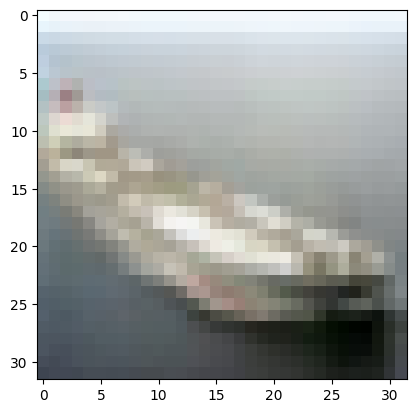

In [3]:
#data visualisation 
i = 2003
plt.imshow(X_train[i])
print(y_train[i])

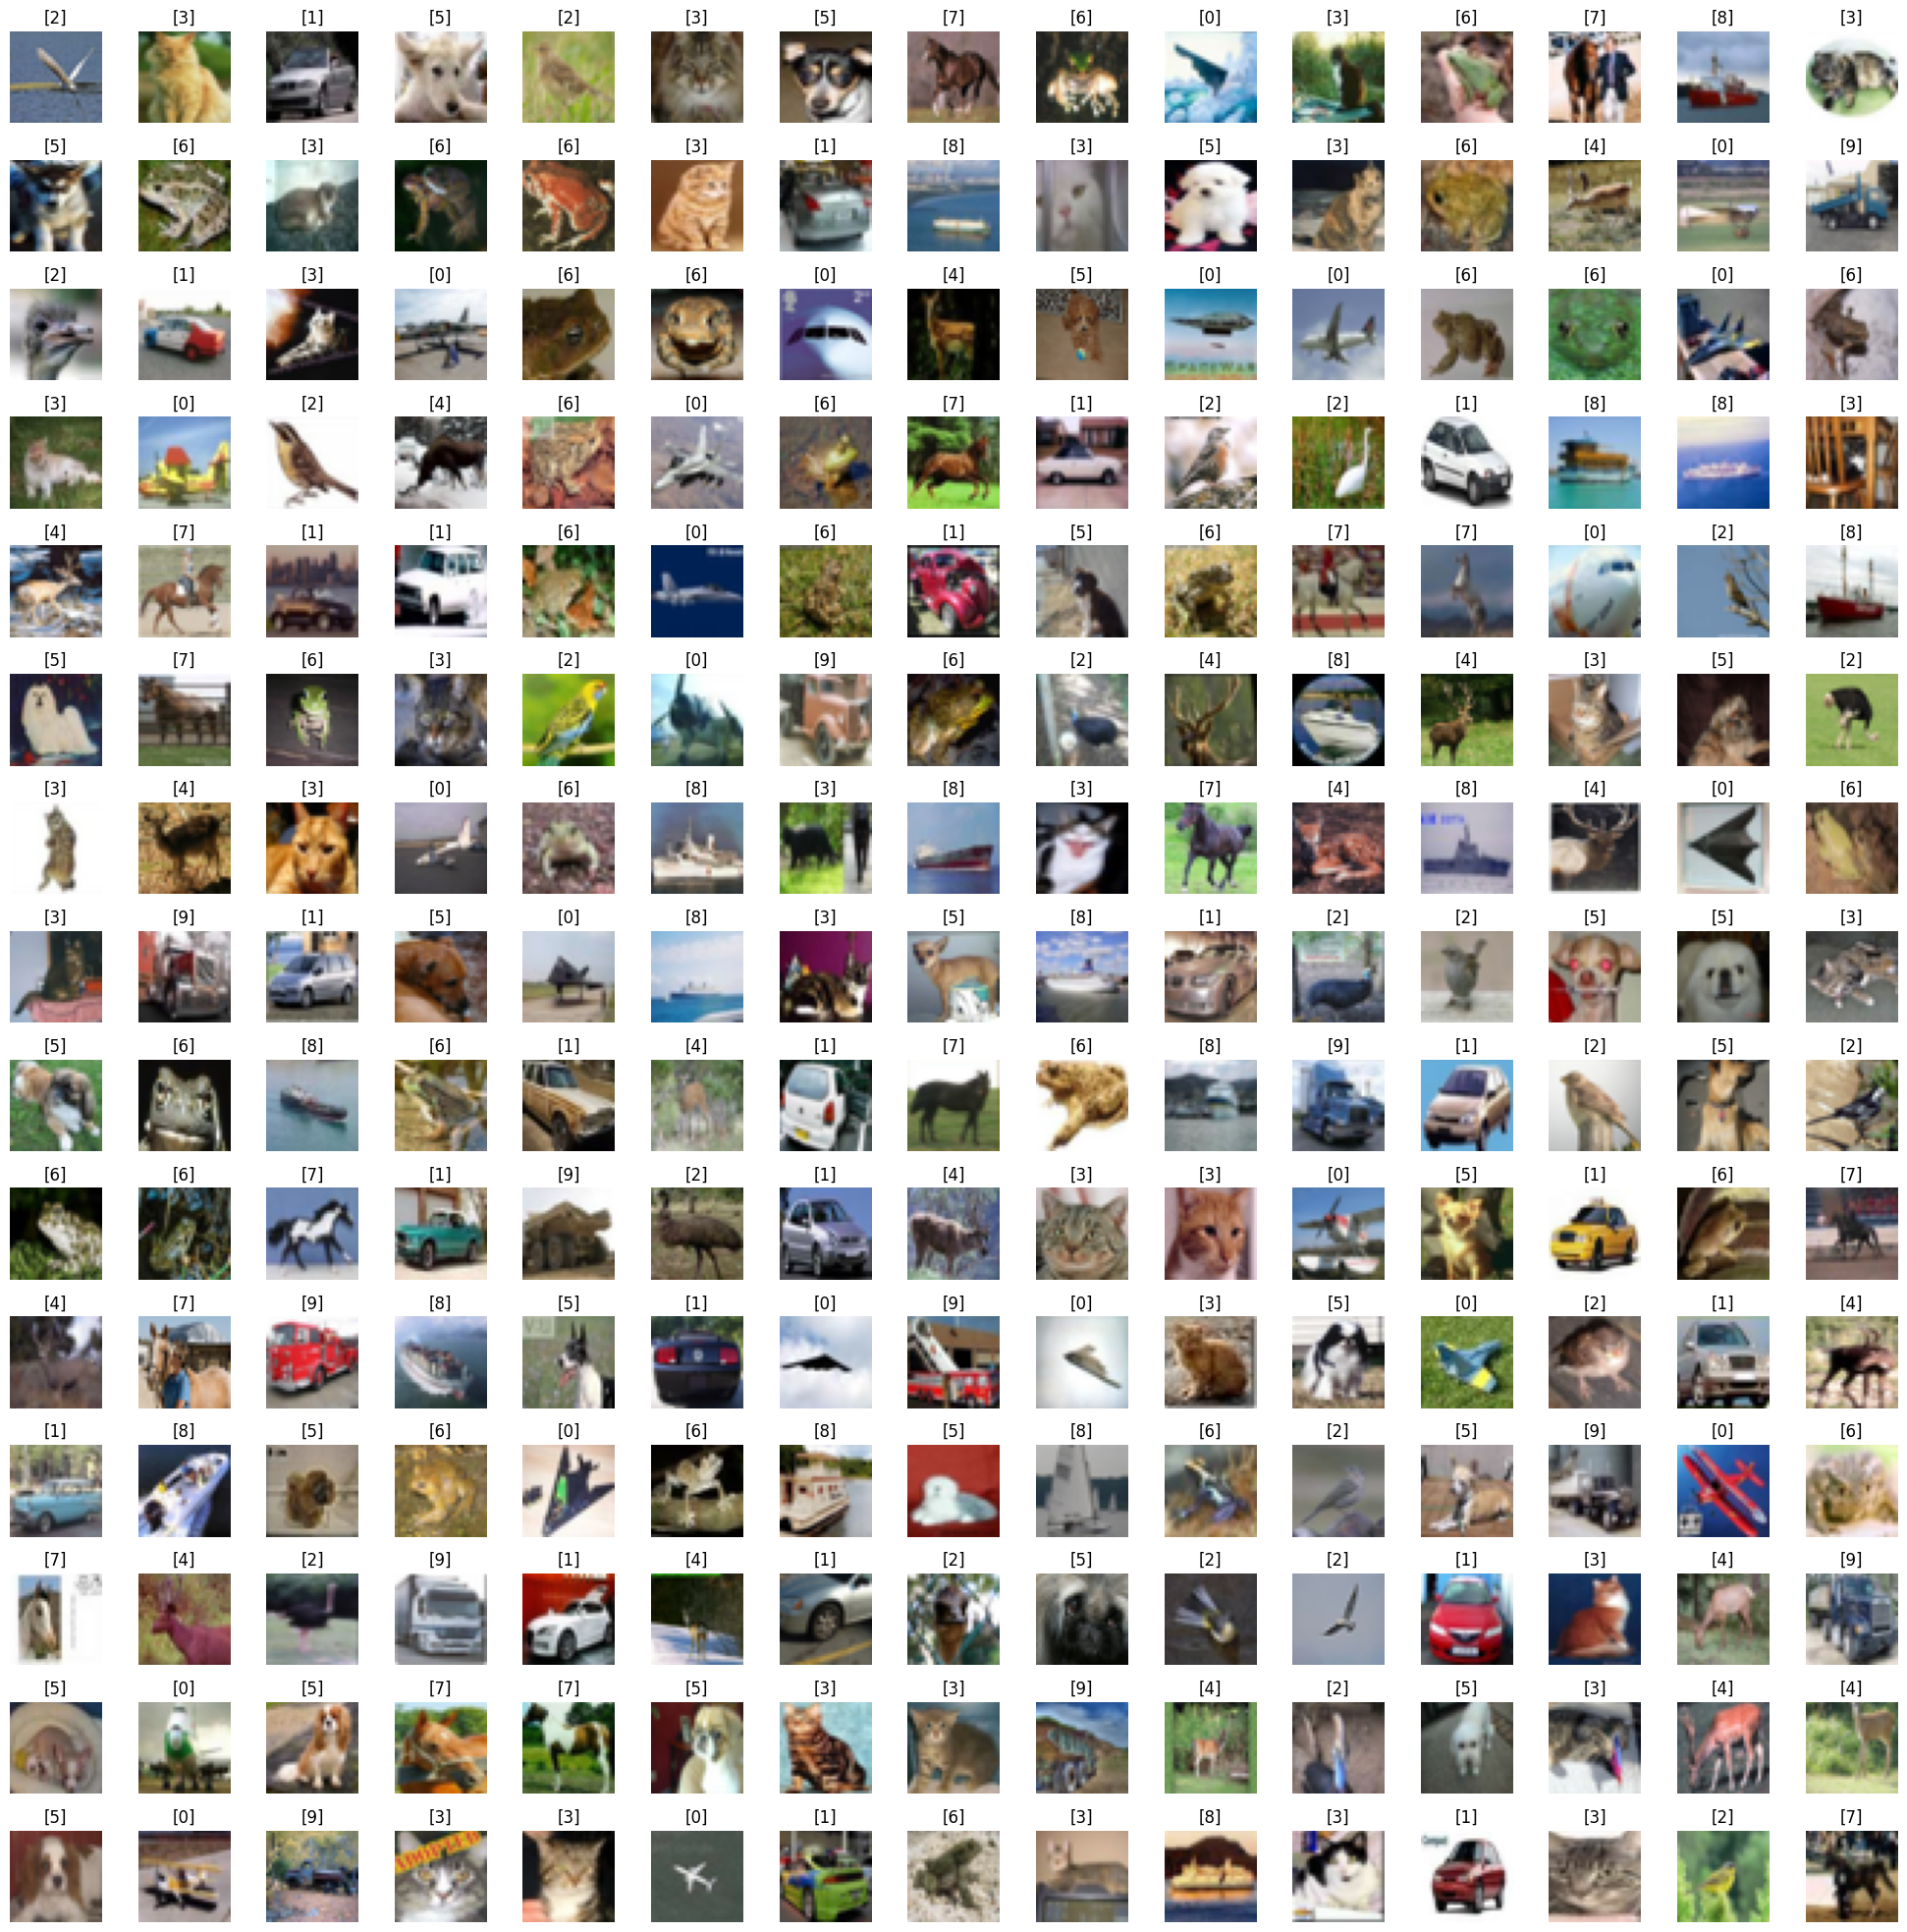

In [4]:
# A grid that shows the images with their corresponding label 
W_grid = 15
L_grid = 15

fig, axes =  plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()


n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis("off")
    
    plt.subplots_adjust(hspace = 0.4)
    

In [5]:
# Data preparation
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [6]:
number_cat = 10

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
y_train = keras.utils.to_categorical(y_train, number_cat)

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [10]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [11]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [12]:
X_train = X_train/255
X_test = X_test/255

X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [13]:
input_shape = X_train.shape[1: ]
input_shape

(32, 32, 3)

In [14]:
# Train the model
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size= (3,3), activation = "relu", input_shape = input_shape )) 
cnn_model.add(Conv2D(filters = 64, kernel_size= (3,3), activation = "relu")) 
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters = 128, kernel_size= (3,3), activation = "relu")) 
cnn_model.add(Conv2D(filters = 128, kernel_size= (3,3), activation = "relu")) 
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units= 1024, activation="relu"))

cnn_model.add(Dense(units= 1024, activation="relu"))

cnn_model.add(Dense(units=10, activation="softmax"))

C:\Users\johnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
cnn_model.compile(loss="categorical_crossentropy", optimizer = keras.optimizers.RMSprop(learning_rate = 0.001))

In [16]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 92ms/step - loss: 1.8700
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 89ms/step - loss: 1.1995


In [17]:
#Model evaluation 
evaluation = cnn_model.evaluate(X_test, y_test)
print("Test Accuracy: {}".format(evaluation))



313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 1.1221
Test Accuracy: 1.1255096197128296


In [18]:
predictions = cnn_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step


array([3, 8, 0, ..., 5, 4, 7], dtype=int64)

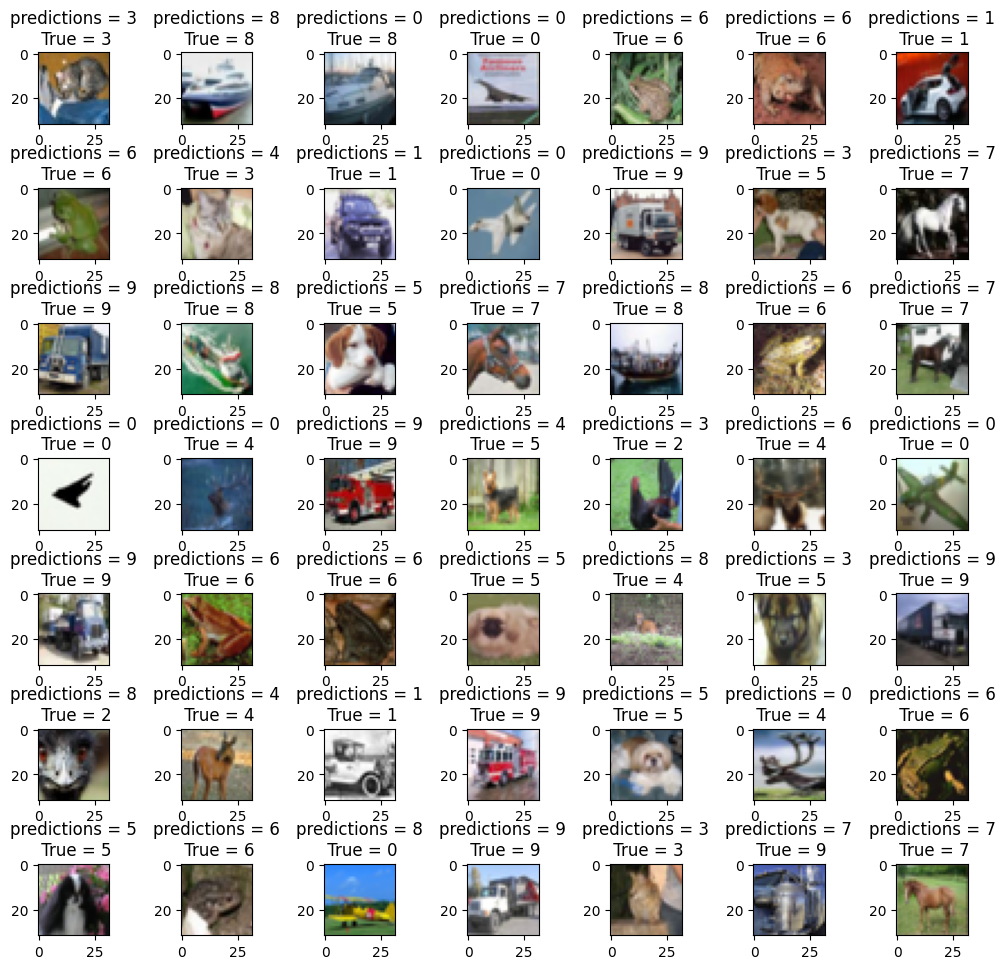

In [19]:
y_test = y_test.argmax(1)

L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title("predictions = {}\n True = {}".format(predicted_classes[i], y_test[i]))
    
    plt.subplots_adjust(wspace = 1)

<Axes: >

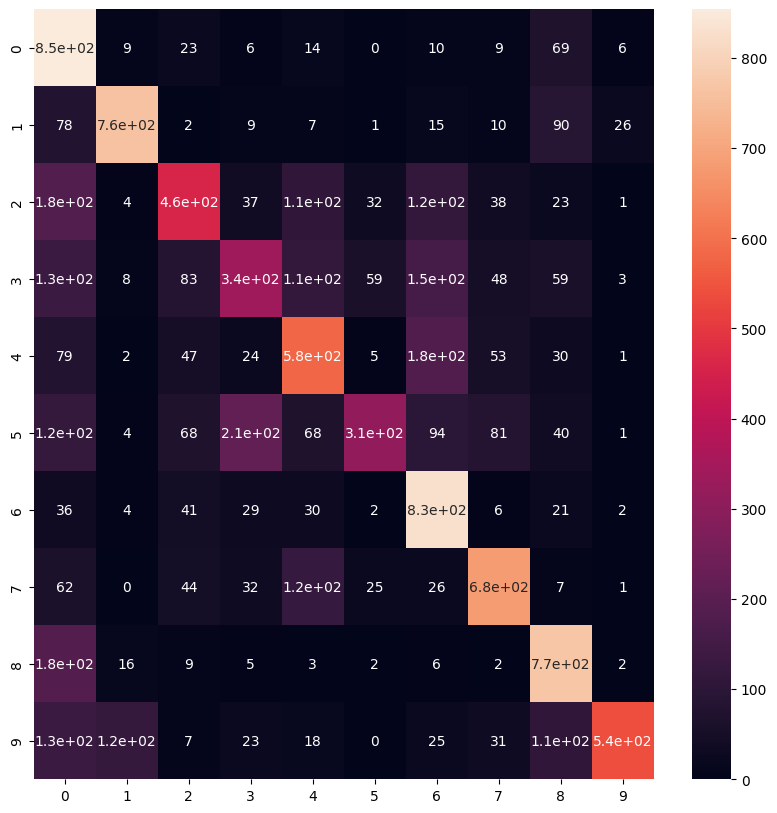

In [20]:
#model accuracy

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [21]:
#saving the model
import os

directory = os.path.join(os.getcwd(), "saved_model")

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, "keras_cifar10_trained_model.h5")
cnn_model.save(model_path)

In [22]:
# Data Augmentation for the CIFAR-10 Dataset
# n = 8
# X_train_sample = X_train[:n]
#X_train_sample.shape
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#datagen_train = ImageDataGenerator(rotation_range = 90)
#datagen_train.fit(X_train)


In [23]:

from PIL import Image

#fig = plt.figure(figsize = (20,2))
#for X_batch in datagen_train.flow(X_train_sample, batch_size = n):
    #for i in range(0,n):
        #ax = fig.add_subplot(1, n, i+1)
        #ax.imshow(Image.fromarray((X_batch[i] * 255).astype(np.uint8)))        
   # fig.suptitle("Augmented images (rotated 90 degrees)")
    #plt.show()
    #break;

In [24]:
datagen = ImageDataGenerator(
    rotation_range = 90,
    width_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True
    )

In [25]:
datagen.fit(X_train)
cnn_model.fit(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)

Epoch 1/2


C:\Users\johnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 94ms/step - loss: 1.7173
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 87ms/step - loss: 1.5403


In [26]:
from tensorflow.keras.utils import to_categorical

# Ensure the model is compiled with the accuracy metric
cnn_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Convert y_test to one-hot encoding
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Evaluate the model
score = cnn_model.evaluate(X_test, y_test_one_hot)

# Print the test accuracy
if isinstance(score, (list, tuple)):
    print("Test accuracy:", score[1])
else:
    print("Test accuracy:", score)


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.5335 - loss: 1.4205
Test accuracy: 0.5356000065803528


In [27]:
# saving the model

directory = os.path.join(os.getcwd(), "saved_model")

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, "keras_cifar10_trained_model_Augmentation.h5")
cnn_model.save(model_path)

: 